# Classification Model

## 1. Training the model

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from numpy import argmax

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

### 1.1 Dense Model

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


ValueError: ignored

In [0]:
for i in range(5):
  fig = plt.figure()
  ax = plt.gca()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')
  fig.suptitle(argmax(model.predict(x_test[i:i+1])))

### 1.2 CNN Model

In [8]:
model = tf.keras.models.Sequential([
  layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)),
  layers.Conv2D(32, kernel_size=3, activation='relu'),
  layers.Flatten(),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 254us/sample - loss: 0.1278 - acc: 0.9611
Epoch 2/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.0456 - acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0300 - acc: 0.9904
Epoch 4/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.0197 - acc: 0.9936
Epoch 5/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.0140 - acc: 0.9955
Epoch 6/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0106 - acc: 0.9965
Epoch 7/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.0068 - acc: 0.9977
Epoch 8/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.0066 - acc: 0.9976
Epoch 9/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.0055 - acc: 0.9983
Epoch 10/10
10000/10000 [================

[0.06125804592244276, 0.987]

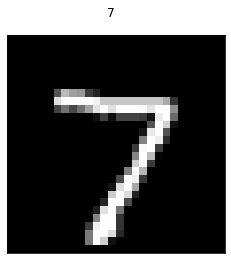

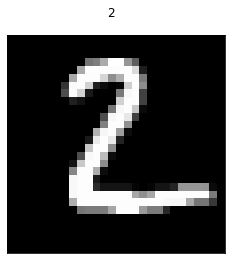

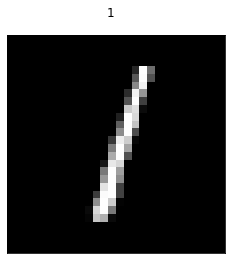

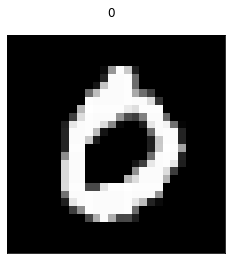

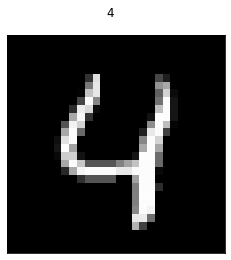

In [9]:
for i in range(5):
  fig = plt.figure()
  ax = plt.gca()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')
  fig.suptitle(argmax(model.predict(x_test[i:i+1])))

## 2. Saving Model Weights
This line saves our model weights into a .h5 file

In [0]:
#---YOU CODE HERE----
model.save('mnist_classifier.h5')

## 3. Installing the TensorFlow.js converter
First, TensorFlow.js needs it's own virtual environment to operate, so we'll make one using python3-venv, but any utility virtual environment utility will do.

Note: jupyter notebooks are ***NOT*** made for this. You should run any shell commands you see here (lines starting with an exclamation mark) on the command line. I am using notebooks for simplicity and illustrative purposes. The worst thing that can happen is that pip replaces the version of a bunch of packages, rendering your python packages unhappy. The reason it doesn't really matter on colab is that it is the code is running on an ephemeral machine which resets when you are done with it. Do ***NOT*** use notebooks for this on your local machine, you have been warned!


In [11]:
#---YOU CODE HERE---
!apt-get install python3-venv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pip-whl python3.6-venv
The following NEW packages will be installed:
  python-pip-whl python3-venv python3.6-venv
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 1,660 kB of archives.
After this operation, 1,901 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python-pip-whl all 9.0.1-2.3~ubuntu1.18.04.1 [1,653 kB]
Ign:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3.6-venv amd64 3.6.8-1~18.04.1
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-venv amd64 3.6.7-1~18.04 [1,208 B]
Err:2 http://security.ubuntu.com/ubuntu bionic-updates/universe amd64 python3.6-venv amd64 3.6.8-1~18.04.1
  404  Not Found [IP: 91.189.88.174 80]
Fetched 1,654 kB in 4s (470 kB/s)
E: Failed to fetch http://security.ub

We create an environment called "tensorflowjs-env"

In [12]:
#---YOU CODE HERE---
!python -m venv .tensorflowjs-env

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt-get install python3-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: ['/content/.tensorflowjs-env/bin/python3', '-Im', 'ensurepip', '--upgrade', '--default-pip']



To install tensorflowjs, we first activate the environment. Then, we can safely install tensorflowjs. Once it's done, we deactivate the virtual environment.

In [13]:
#---YOU CODE HERE---
!source .tensorflowjs-env/bin/activate
!pip install tensorflowjs
!deactivate

/bin/bash: .tensorflowjs-env/bin/activate: No such file or directory
     |████████████████████████████████| 51kB 1.9MB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 17.3MB 8.2MB/s 
     |████████████████████████████████| 109.2MB 1.5MB/s 
     |████████████████████████████████| 256kB 43.9MB/s 
     |████████████████████████████████| 890kB 44.1MB/s 
     |████████████████████████████████| 655kB 39.2MB/s 
     |████████████████████████████████| 491kB 43.6MB/s 
     |████████████████████████████████| 3.2MB 37.4MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32853 sha256=44d92726892dcfae0b3c7560d7eaaa946dd2d1bc9161f6592410cd5a5dc88a39
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
  Created wheel for regex: filename=regex-2019.8.19-cp36-cp36m-linux_x86_64.whl size=609230 sha256=9123c438c8df88eda4ab68aa7f218d13565051800f98a0251457628023c9fd6f


/bin/bash: deactivate: command not found


Now we convert the .h5 file into tensorflow.js's format

In [14]:
#---YOU CODE HERE---
!source .tensorflowjs-env/bin/activate
!tensorflowjs_converter --input_format keras mnist_classifier.h5
!deactivate

/bin/bash: .tensorflowjs-env/bin/activate: No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 10, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/converter.py", line 649, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/converter.py", line 653, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/converter.py", line 551, in convert
    'Missing output_path argument. For usage, use the --help flag.')
ValueError: Missing output_path argument. For usage, use the --help flag.
/bin/bash: deactivate: command not found


Since we're in colab, we download the files. On your local machine, you would simply move the files to your website directory

In [0]:
from google.colab import files
files.download('model.json')
files.download('group1-shard1of1.bin')

## 4. Importing the Model into the Browser
Workshop will continue with client-side code which can be found at https://github.com/Symmetries/f2019workshop2/tree/workshop